## **Data preparation**

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size=0.2)
print(f"Train shape: {X_train.shape}", 
      f"Test shape: {X_test.shape}", sep="\n")

Train shape: (16512, 8)
Test shape: (4128, 8)


## **Data without scaling**

### **KNNRegessor**

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [4]:
knn.fit(X_train, y_train);

In [5]:
from sklearn.metrics import r2_score

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print(f"Train R2: {r2_score(y_train, pred_train):.3f}", 
      f"Test R2: {r2_score(y_test, pred_test):.3f}", sep="\n")

Train R2: 0.455
Test R2: 0.139


### **Linear regression**

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [7]:
lr.fit(X_train, y_train);

In [8]:
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

print(f"Train R2: {r2_score(y_train, pred_train):.3f}", 
      f"Test R2: {r2_score(y_test, pred_test):.3f}", sep="\n")

Train R2: 0.611
Test R2: 0.588


### **Decision tree regressor**

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=30, max_depth=9)

In [10]:
tree.fit(X_train, y_train);

In [11]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

print(f"Train R2: {r2_score(y_train, pred_train):.3f}", 
      f"Test R2: {r2_score(y_test, pred_test):.3f}", sep="\n")

Train R2: 0.807
Test R2: 0.683


## **Data scaling witn MinMaxScaler**

In [12]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [13]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X);

In [14]:
mms.data_max_

array([ 1.50001000e+01,  5.20000000e+01,  1.41909091e+02,  3.40666667e+01,
        3.56820000e+04,  1.24333333e+03,  4.19500000e+01, -1.14310000e+02])

In [15]:
import numpy as np
np.set_printoptions(suppress=True)

In [16]:
mms.data_max_

array([   15.0001    ,    52.        ,   141.90909091,    34.06666667,
       35682.        ,  1243.33333333,    41.95      ,  -114.31      ])

In [17]:
X_norm = pd.DataFrame(mms.transform(X), columns=X.columns)
X_norm.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


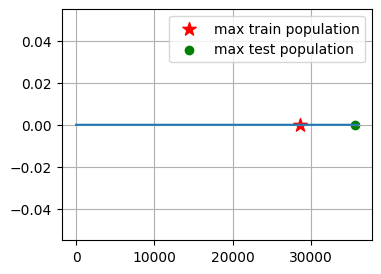

In [18]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(0, 36000)
y = x * 0
plt.figure(figsize=(4, 3))
plt.plot(x, y)
plt.scatter([X_train["Population"].max()], [0], label = "max train population", marker="*", c="r", s=100)
plt.scatter([X_test["Population"].max()], [0], label = "max test population", marker="o", c="g")
plt.grid()
plt.legend()
plt.show();

In [19]:
mms.fit(X_train);

In [20]:
X_train_norm = pd.DataFrame(mms.transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)
X_train_norm['Population'].max(), X_test_norm['Population'].max()

(1.0, 1.2491334943808423)

In [21]:
mins = X_train.min()
maxs = X_train.max()
maxs

MedInc           15.000100
HouseAge         52.000000
AveRooms        141.909091
AveBedrms        34.066667
Population    28566.000000
AveOccup       1243.333333
Latitude         41.950000
Longitude      -114.310000
dtype: float64

Проведём нормализацию признаков по формуле: 
$$x=\frac{x-min} {max-min}$$

In [22]:
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
X_train_norm = (X_train_norm - mins) / (maxs - mins)
X_test_norm = (X_test_norm - mins) / (maxs - mins)

In [23]:
X_train_norm.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,0.232921,0.541644,0.032195,0.022629,0.049968,0.001897,0.327130,0.476913
std,0.132189,0.247791,0.017910,0.014371,0.039148,0.009333,0.226944,0.199337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142431,0.333333,0.025236,0.019938,0.027623,0.001358,0.146809,0.254980
50%,0.209563,0.549020,0.030787,0.021205,0.040857,0.001670,0.180851,0.583665
75%,0.292693,0.705882,0.036568,0.022721,0.060603,0.002041,0.548936,0.632470
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Data scaling with Standart scaler**

$$x=\frac{x-mean} {std}$$

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train);

In [25]:
X_train_norm = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### **KNNRegessor**

In [26]:
knn.fit(X_train_norm, y_train);

In [27]:
from sklearn.metrics import r2_score

pred_train = knn.predict(X_train_norm)
pred_test = knn.predict(X_test_norm)

print(f"Train R2: {r2_score(y_train, pred_train):.3f}", 
      f"Test R2: {r2_score(y_test, pred_test):.3f}", sep="\n")

Train R2: 0.794
Test R2: 0.663


### **Linear regression**

In [28]:
lr.fit(X_train_norm, y_train);

In [29]:
pred_train = lr.predict(X_train_norm)
pred_test = lr.predict(X_test_norm)

print(f"Train R2: {r2_score(y_train, pred_train):.3f}", 
      f"Test R2: {r2_score(y_test, pred_test):.3f}", sep="\n")

Train R2: 0.611
Test R2: 0.588


### **Decision tree regressor**

In [30]:
tree.fit(X_train_norm, y_train);

In [31]:
pred_train = tree.predict(X_train_norm)
pred_test = tree.predict(X_test_norm)

print(f"Train R2: {r2_score(y_train, pred_train):.3f}", 
      f"Test R2: {r2_score(y_test, pred_test):.3f}", sep="\n")

Train R2: 0.807
Test R2: 0.683


## **Summary**

Data scaling is good only for KN Regression, for linear regression and decision trees it does not matter on which data values they are trained.

MinMaxScaler:
$$x=\frac{x-min} {max-min}$$

StandartScaler:
$$x=\frac{x-mean} {std}$$